In [285]:
import pandas as pd

In [286]:
train_a = pd.read_parquet('../A/train_targets.parquet')
train_b = pd.read_parquet('../B/train_targets.parquet')
train_c = pd.read_parquet('../C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('../A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('../A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../C/X_test_estimated.parquet')

In [287]:
X_test_estimated_a.set_index('date_forecast', inplace=True)

In [288]:
X_test_estimated_a.shape

(2880, 46)

In [289]:
full_date_range = pd.date_range(start=X_test_estimated_a.index.min(), end=X_test_estimated_a.index.max(), freq='H')
missing_dates = full_date_range.difference(X_test_estimated_a.index)
missing_df = pd.DataFrame(index=missing_dates)
X_test_estimated_a = pd.concat([X_test_estimated_a, missing_df]).sort_index()
X_test_estimated_a.head()

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
2023-05-01 00:00:00,2023-04-30 07:00:04,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,...,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
2023-05-01 00:15:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,...,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2023-05-01 00:30:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,...,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
2023-05-01 00:45:00,2023-04-30 07:00:04,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,...,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
2023-05-01 01:00:00,2023-04-30 07:00:04,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,...,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0


In [290]:
X_test_estimated_a.shape

(3696, 46)

<Axes: >

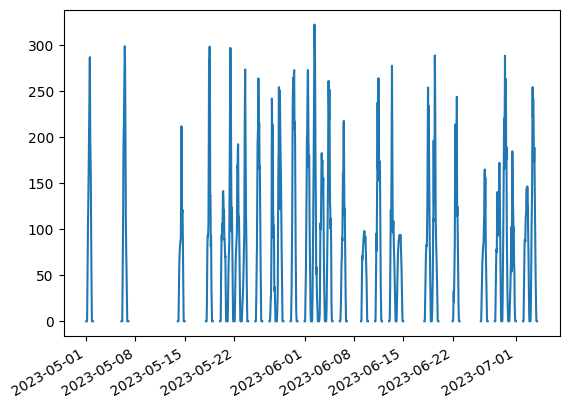

In [291]:
X_test_estimated_a['diffuse_rad:W'].plot()

In [292]:
X_test_estimated_a.drop(['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3', 'date_calc'], axis=1, inplace=True)
X_test_estimated_a.isnull().sum()

absolute_humidity_2m:gm3          816
air_density_2m:kgm3               816
clear_sky_energy_1h:J             816
clear_sky_rad:W                   816
dew_or_rime:idx                   816
dew_point_2m:K                    816
diffuse_rad:W                     816
diffuse_rad_1h:J                  816
direct_rad:W                      816
direct_rad_1h:J                   816
effective_cloud_cover:p           816
elevation:m                       816
fresh_snow_12h:cm                 816
fresh_snow_1h:cm                  816
fresh_snow_24h:cm                 816
fresh_snow_3h:cm                  816
fresh_snow_6h:cm                  816
is_day:idx                        816
is_in_shadow:idx                  816
msl_pressure:hPa                  816
precip_5min:mm                    816
precip_type_5min:idx              816
pressure_100m:hPa                 816
pressure_50m:hPa                  816
prob_rime:p                       816
rain_water:kgm2                   816
relative_hum

In [293]:
X_test_estimated_a.dtypes

absolute_humidity_2m:gm3          float32
air_density_2m:kgm3               float32
clear_sky_energy_1h:J             float32
clear_sky_rad:W                   float32
dew_or_rime:idx                   float32
dew_point_2m:K                    float32
diffuse_rad:W                     float32
diffuse_rad_1h:J                  float32
direct_rad:W                      float32
direct_rad_1h:J                   float32
effective_cloud_cover:p           float32
elevation:m                       float32
fresh_snow_12h:cm                 float32
fresh_snow_1h:cm                  float32
fresh_snow_24h:cm                 float32
fresh_snow_3h:cm                  float32
fresh_snow_6h:cm                  float32
is_day:idx                        float32
is_in_shadow:idx                  float32
msl_pressure:hPa                  float32
precip_5min:mm                    float32
precip_type_5min:idx              float32
pressure_100m:hPa                 float32
pressure_50m:hPa                  

In [294]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_test_estimated_a = X_test_estimated_a.astype('float64')

original_index = X_test_estimated_a.index

imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(X_test_estimated_a)
X_test_estimated_a = pd.DataFrame(imputed, columns=X_test_estimated_a.columns, index=original_index)

In [295]:
X_test_estimated_a.isnull().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
sfc_pressure:hPa            

<Axes: >

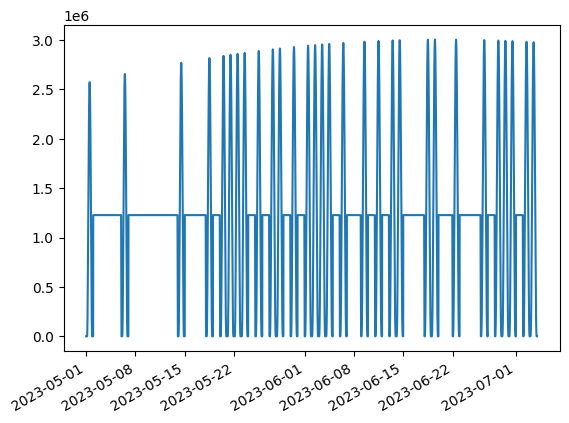

In [296]:
X_test_estimated_a['clear_sky_energy_1h:J'].plot()

<Axes: >

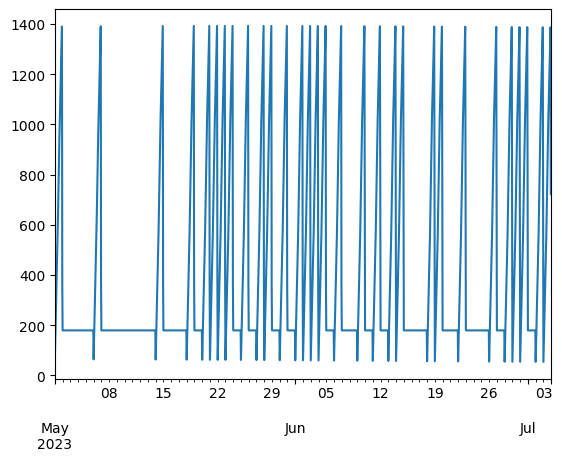

In [297]:
X_test_estimated_a = X_test_estimated_a.resample('60min').sum()
X_test_estimated_a['sun_azimuth:d'].plot()